In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
import subprocess

# Number of iterations
num_runs = 20 
results_output_filename = "~/Documents/digital_twins/metrics/matlab_results.csv"
simulation_duration = 1 # in seconds

# Clean up
os.system("rm " + results_output_filename)

# Run MATLAB script for each arrival rate
for i in range(1, num_runs + 1):
    rate = 1000
    staPos = f"[{5*i},0,0]"
    # staPos = "[2 0 0]"  # Fixed position for all runs
   
    print(f"\n\n🔄 Exécution {i}/{num_runs} avec staPosition={staPos}, rate={rate}, simulationDuration={simulation_duration}")

    # Exécution de la commande avec les paramètres
    command = f"/usr/local/bin/matlab -batch \"simulate_simple({staPos},{rate},{simulation_duration})\""

    # os.system(command)
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)


print("✅ Toutes les exécutions sont terminées !")




🔄 Exécution 1/20 avec staPosition=[5,0,0], rate=1000, simulationDuration=1
switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>. 
Simulation completed for Arrival Rate: 1000




🔄 Exécution 2/20 avec staPosition=[10,0,0], rate=1000, simulationDuration=1
switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>. 
Simulation completed for Arrival Rate: 1000




🔄 Exécution 3/20 avec staPosition=[15,0,0], rate=1000, simulationDuration=1
switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>. 
Simulation completed for Arrival Rate: 1000




🔄 Exécution 4/20 avec staPosition=[20,0,0], rate=1000, simulationDuration=1
switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>. 
Simulation completed for Arrival Rate: 1000




🔄 Exécution 5/20 avec staPosition=[25,0,0], rate=1000, simulationDuration=1
switchi

ValueError: x and y must have same first dimension, but have shapes (20,) and (21,)

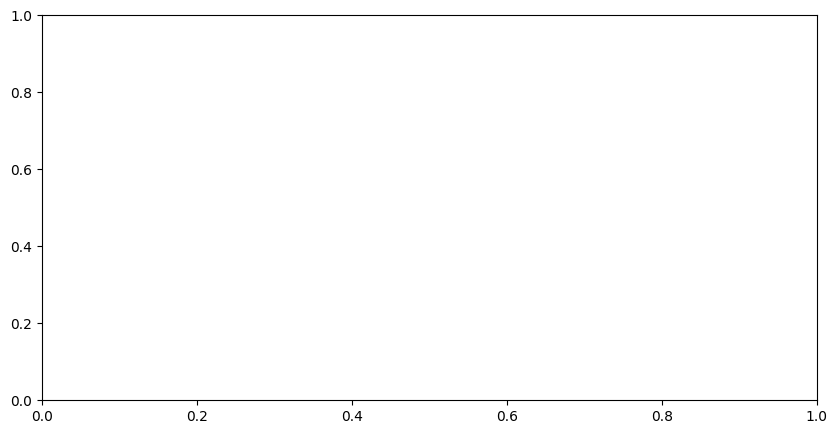

In [ ]:
# Charger les données depuis un fichier CSV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("~/Documents/digital_twins/metrics/matlab_results.csv")

# Replace all zeros in column "Average Delay (s)" with ""
data.loc[data["Average Delay (s)"] == 0.0, "Average Delay (s)"] = np.nan

distances = range(5, 5 * (num_runs + 1), 5)

# # Tracer Packets Sent et NbReceivedPackets vs distances
# plt.figure(figsize=(10, 5))
# plt.plot(distances, data["Packets Sent"], label="Packets Sent", marker="o", color="g")
# plt.xlabel("Distances (m)")
# plt.ylabel("Number of Packets")
# plt.title("Reception Rate vs Distance")
# plt.legend()
# plt.grid(True)
# plt.savefig("figures/sent_received_packets.png", dpi=300)  # Sauvegarde en PNG avec haute résolution
# plt.show()

# Tracer la Latence vs ArrivalRate
plt.figure(figsize=(10, 5))
plt.plot(distances, data["Average Delay (s)"], label="Average Delay (s)", marker="o", color="r")
plt.xlabel("Distances (m)")
plt.ylabel("Average Delay (s)")
plt.title("Average Delay (s) vs Distance")
plt.legend()
plt.grid(True)
plt.savefig("figures/latency_vs_arrival_rate.png", dpi=300)
plt.show()

# Tracer le Débit (Throughput) vs ArrivalRate
plt.figure(figsize=(10, 5))
plt.plot(distances, data["Throughput"], label="Throughput", marker="o", color="g")
plt.xlabel("Distances (m)")
plt.ylabel("Throughput (Mbps)")
plt.title("Throughput vs Distance")
plt.legend()
plt.grid(True)
plt.savefig("figures/throughput_vs_arrival_rate.png", dpi=300)
plt.show()
